# Dimensionality Reduction (PCA, KernelPCA, LDA, Correlation Analysis)

**Исполнители (ФИО):** Буканов Иван, Макеев Максим

---

Здравствуйте! На этом семинаре вы познакомитесь с новыми методами решения задачи понижения размерности: Метод Главных Компонент (PCA) и его ядерная вариация (KernelPCA), а также примените уже известные вам методы Линейный Дискриминантный Анализ (LDA) и Корреляционный Анализ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Полезные ссылки:**

[Построение BiPlot для PCA](https://sukhbinder.wordpress.com/2015/08/05/biplot-with-python/)

[Матрица частных корреляций](https://pingouin-stats.org/build/html/generated/pingouin.pcorr.html)

[Графики попарных соотношений между фичами в датасете](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

[Сравнение PCA и Kernel PCA](https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html)

## Задача 1

В этой задаче вам предстоит сравнить два классических подхода для уменьшения размерности - Наивный Корреляционный Анализ и Метод Главных Компонент (PCA)

Загрузите датасет drug200.csv

In [ ]:
# Your code here

Как вы помните из курса АнДана, если в модели есть зависимые параметры, мы можем попробовать убрать один из них, тем самым понизив размерность, однако это работает не всегда. Используя матрицу корреляций, попробуйте понизить размерность данных. Если возможно, визуализируйте полученные данные

In [ ]:
# Your code here

**Вопрос:** Какие фичи убрали и почему?

Your answer here

Не наивный подход для уменьшения размерности заключается в построении нового базиса на основе данных таким образом, чтобы максимизировать «информацию» базисных векторов на каждом шаге построения

Одним из таких вариантов построения является Метод Главных Компонент (PCA), который сохраняет вариацию в данных. Этот метод также позволяет посмотреть долю объясненной дисперсии векторов нового базиса, чтобы оценить, сколько «информации» сохранилось

Теперь попробуйте понизить размерность данных с помощью [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). Если возможно, визуализируйте полученные данные

In [ ]:
# Your code here

**Вопрос:** Сколько векторов нового базиса вы взяли для уменьшения размерности? Как много информации вы потеряли?

Your answer here

Теперь сравните качество классификации Логистической регрессии на трех полученных датасетах: исходный и два варианта понижения размерности

In [ ]:
# Your code here

**Вопрос:** Как понижение размерности повлияло на качество классификации? Как вы думаете, почему?

Your answer here

## Задача 2

Для визуализации данных строят график в пространстве 2-х главных компонент. При этом можно использовать так называемый BiPlot, позволяющий получить больше информации, чем просто двумерный
график. BiPlot, помимо того, что отображает проекции данных в пространстве новых фичей на две главные компоненты, также добавляет проекции векторов исходных фичей, что позволяет увидеть их вклад в главные компоненты (оси координат в BiPlot)

Визуализируйте [BiPlot](https://sukhbinder.wordpress.com/2015/08/05/biplot-with-python/) на данных из предыдущей задачи

In [ ]:
# Your code here

**Вопрос:** Опишите вклад исходных фичей в две главные компоненты

Your answer here

Теперь загрузите датасет о вине [load_wine](https://scikit-learn.org/1.7/modules/generated/sklearn.datasets.load_wine.html). Примените к нему понижение размерности и постройте BiPlot

In [ ]:
# Your code here

BiPlot может быть полезен, чтобы сделать некоторые предроложения о взаимосвязи исходых параметрами и классов. Например, угол между исходными параметрами в первом приближении отражает степень их зависимости, а направление вектора может говорить о том, что точки, лежащие близ него имеют большее значение по данному параметру. Однако, так как на BiPlot мы работаем с проекцией только на две компоненты, эти соотношения могут выполняться не всегда.

Проверьте, выполняются ли какие-либо соотношения для каких-то параметров в вашем случае.

In [ ]:
# Your code here

**Вопрос:** Получилось ли извлечь какую-то дополнительную информацию из BiPlot? Если да, то какую?

Your answer here

## Задача 3

Помимо классического PCA есть и другие способы понижать размерность. Для начала давайте рассмотрим уже известный вам Линейный дискриминантный анализ (LDA), он позволяет не только решать задачу классификации, но и понижать размерность.

Как вы помните из лекции, LDA максимизирует межклассовую вариацию и минимизирует внутриклассовую вариацию, то есть последовательно строит базис такой, чтобы на каждом шаге направление вдоль базисного вектора максимизировало «расстояние» между классами.


Загрузите датасет [breast_cancer](https://scikit-learn.org/1.7/modules/generated/sklearn.datasets.load_breast_cancer.html) и попробуйте понизить размерность с помощью [LDA](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

In [12]:
import sklearn
from sklearn.datasets import load_breast_cancer 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split


Исходная размерность: (398, 30)
размерность после LDA: (398, 1)


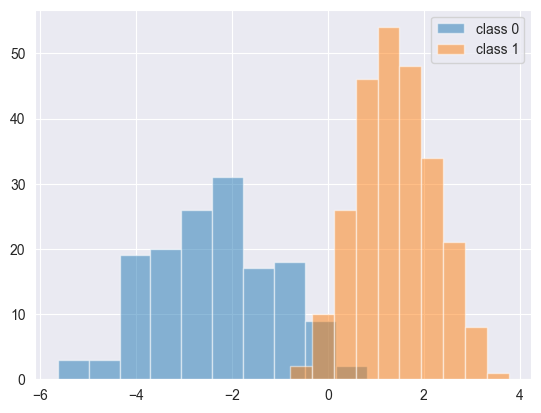

In [14]:
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=52)

lda = LinearDiscriminantAnalysis(n_components=1)

lda.fit(X_train, y_train)

X_train_lda = lda.transform(X_train)
X_test_lda = lda.transform(X_test)

print("Исходная размерность:", X_train.shape)
print("размерность после LDA:", X_train_lda.shape)


plt.hist(X_train_lda[y_train == 0], alpha=0.5, label='class 0')
plt.hist(X_train_lda[y_train == 1], alpha=0.5, label='class 1')
plt.legend()
plt.show()

**Вопрос:**
 Сколько векторов получилось в новом базисе, какие из них вы взяли и почему?
1 из 1

Как вы помните из прошлого семинара, в случае сложной топологии данных, бывает полезно применить ядро, которое позволяет нам перейти в новое пространство, в котором данные становястя ближе к линейно разделимым. Аналогично для PCA есть его ядерная модификация - [Kernel PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html). Однако так как мы совершали переход в новое пространство, для Ядерного PCA BiPlot построить не получится.

**Вопрос:** Как вы думаете, почему не получится построить BiPlot для Kernel PCA?

потому что в Kernel PCA (неявно) данные проецируются в высокоразмерное пространство через ядро, и связи с исходными признаками теряются — нельзя просто взять “коэффициенты” признаков, как в линейной PCA, чтобы отобразить их в BiPlot.

Теперь попробуйте применить Ядерный PCA с нелинейным ядром, чтобы понизить размерность

Исходная размерность: (398, 30)
После Kernel PCA: (398, 4)


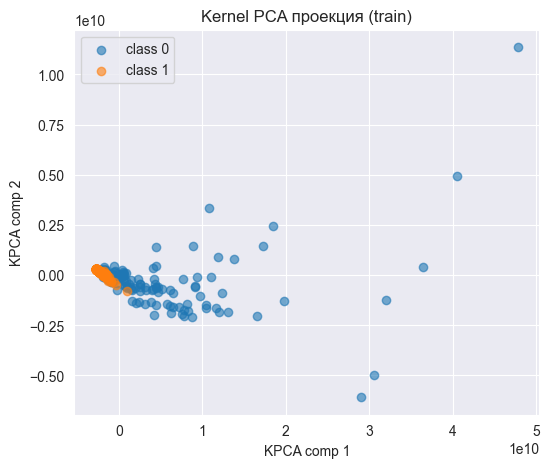

In [45]:
from sklearn.decomposition import PCA, KernelPCA

kpca = KernelPCA(   n_components=4,         # уменьшаем до 2 компонент
                 kernel='poly',            # ядро: rbf, poly, sigmoid и др.
                  gamma=1,                # параметр ядра
                 degree=3,
                 fit_inverse_transform=False,  # обратное преобразование
                 remove_zero_eig=True)

X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

print("Исходная размерность:", X_train.shape)
print("После Kernel PCA:", X_train_kpca.shape)

if X_train_kpca.shape[1] >= 2:
    plt.figure(figsize=(6, 5))
    for cls in [0, 1]:
        plt.scatter(X_train_kpca[y_train == cls, 0],
                    X_train_kpca[y_train == cls, 1],
                    label=f"class {cls}", alpha=0.6)
    plt.xlabel("KPCA comp 1")
    plt.ylabel("KPCA comp 2")
    plt.legend()
    plt.title("Kernel PCA проекция (train)")
    plt.show()
else:
    # одномерный случай — гистограмма
    plt.hist(X_train_kpca[y_train == 0], alpha=0.5, label='class 0')
    plt.hist(X_train_kpca[y_train == 1], alpha=0.5, label='class 1')
    plt.legend()
    plt.title("Kernel PCA одномерная проекция")
    plt.show()

**Вопрос:** Сколько векторов получилось в новом базисе, какие из них вы взяли и почему?

Взяли те два собственных вектора ядровой матрицы, у которых наибольшие собственные значения (то есть они объясняют наибольшую долю “вариации” в ядровом пространстве).

Теперь сравните качество классификации Логистической регрессии на всех полученных датасетах: исходный и с понижением размерности (PCA, Kernel PCA, LDA)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

def eval_logreg(X_tr, X_te, y_tr, y_te):
    model = LogisticRegression(max_iter=1000)  
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)
    y_proba = model.predict_proba(X_te)[:, 1]
    acc = accuracy_score(y_te, y_pred)
    auc = roc_auc_score(y_te, y_proba)
    return acc, auc

results = {}

results["Исходные"] = eval_logreg(X_train, X_test, y_train, y_test)
results["PCA"] = eval_logreg(X_train_pca, X_test_pca, y_train, y_test)
results["Kernel PCA"] = eval_logreg(X_train_kpca, X_test_kpca, y_train, y_test)
results["LDA"] = eval_logreg(X_train_lda, X_test_lda, y_train, y_test)

for k, (acc, auc) in results.items():
    print(f"{k}: Accuracy = {acc:.4f}, AUC = {auc:.4f}")


Исходные: Accuracy = 0.9649, AUC = 0.9931
PCA: Accuracy = 0.9532, AUC = 0.9885
Kernel PCA: Accuracy = 0.9006, AUC = 0.9449
LDA: Accuracy = 0.9825, AUC = 0.9939


/Users/zuha/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Вопрос:** Как понижение размерности повлияло на качество классификации? Какой вариант понижения размерности оказался наиболее эффективен? Как вы думаете, почему?

Your answer here

## Задача 4

Загрузите набор данных [digits](https://scikit-learn.org/1.7/modules/generated/sklearn.datasets.load_digits.html)
1. Попробуйте понизить размерность датасета так, чтобы его можно было отрисовать
2. Попробуйте объединить несколько подходов понижения размерности данных
3. Попробуйте добиться наилучшего соотношения между количеством фичей и качеством классификации, обоснуйте свой выбор


In [ ]:
# Your code here